In [207]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [208]:
#Reading working data
dataset = pd.read_excel("Final_Data.xls")
data = dataset.iloc[:,1:len(dataset)]

In [209]:
#Printing data columns
data.head()

,cement,blast,flyash,water,plast,coarse,fine,age,strength
0,331.000000,170.00,0.00,195.00,8.00,811.0,778.45,28,3
1,393.000000,0.00,0.00,192.00,0.00,940.0,758.00,3,1
2,212.000000,0.00,124.78,185.70,7.84,1085.4,799.54,14,2
3,280.729655,144.20,112.30,220.10,10.10,923.2,657.90,28,1
4,165.000000,0.02,143.57,163.81,0.00,1005.6,900.90,3,1


In [210]:
#Saving our predictor and response variables in different dataframe 
y = data.strength
x = data.drop('strength',axis=1)

In [211]:
#Calculating VIF for detecting collinearity 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"] = x.columns
print(vif)

   VIF Factor Features
0   14.478621   cement
1    2.823529    blast
2    3.451721   flyash
3   84.423071    water
4    4.385283    plast
5   90.438337   coarse
6   76.642105     fine
7    1.662904      age


In [212]:
#Dropping variables coarse and fine with high VIF
x_new = x.drop(['coarse','fine'], axis = 1)

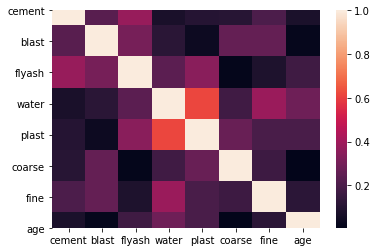

In [213]:
#Correlation plot to show the inter correlation among the feature variables
sns.heatmap(x.corr().abs())
plt.show()

In [214]:
#Training a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
accuracy = cross_val_score(knn, x_new, y, scoring='accuracy', cv=KFold(10, shuffle=True, random_state = 1)) 
rmse = np.sqrt(-np.mean(cross_val_score(knn, x_new, y, scoring='neg_mean_squared_error', cv=KFold(10, shuffle=True,random_state = 1))))
mae = np.mean(cross_val_score(knn, x_new, y, scoring='neg_mean_absolute_error', cv=KFold(10, shuffle=True,random_state = 1)))
print("RMSE of KNN Classifier is: " , rmse)
print("Negetive MAE of KNN Classifier is :", mae)
print("Accuracy of KNN Classifier is: " , accuracy.max()* 100)

#y_pred = cross_val_predict(knn, x_new, y, cv=KFold(10, shuffle=True, random_state = 1))
#conf_mat = confusion_matrix(y, y_pred)
#print('Confusion Matrix :\n')
#print(conf_mat)

RMSE of KNN Classifier is:  0.6661000828616894
Negetive MAE of KNN Classifier is : -0.3718446601941747
Accuracy of KNN Classifier is:  72.81553398058253


In [215]:
#Training a Naive Bayes classifier 
gnb = GaussianNB()
accuracy = cross_val_score(gnb, x_new, y, scoring='accuracy', cv=KFold(10, shuffle=True, random_state = 1)) 
rmse = np.sqrt(-np.mean(cross_val_score(gnb, x_new, y, scoring='neg_mean_squared_error', cv=KFold(10, shuffle=True,random_state = 1))))
mae = np.mean(cross_val_score(gnb, x_new, y, scoring='neg_mean_absolute_error', cv=KFold(10, shuffle=True,random_state = 1)))
print("RMSE of Naive Bayes Classifier is: " , rmse)
print("Negetive MAE of Naive Bayes Classifier is :", mae)
print("Accuracy of Naive Bayes Classifier is: " , accuracy.max()* 100)

#y_pred = cross_val_predict(gnb, x_new, y, cv=KFold(10, shuffle=True, random_state = 1))
#conf_mat = confusion_matrix(y, y_pred)
#print('Confusion Matrix :\n')
#print(conf_mat)

RMSE of Naive Bayes Classifier is:  0.8004852897018946
Negetive MAE of Naive Bayes Classifier is : -0.5339805825242718
Accuracy of Naive Bayes Classifier is:  59.22330097087378


In [216]:
#Training a DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 10,random_state = 1)
accuracy = cross_val_score(dtree_model, x_new, y, scoring='accuracy', cv=KFold(10, shuffle=True, random_state = 1)) 
rmse = np.sqrt(-np.mean(cross_val_score(dtree_model, x_new, y, scoring='neg_mean_squared_error', cv=KFold(10, shuffle=True,random_state = 1))))
mae = np.mean(cross_val_score(dtree_model, x_new, y, scoring='neg_mean_absolute_error', cv=KFold(10, shuffle=True,random_state = 1)))
print("RMSE of Decision TRee Classifier is: " , rmse)
print("Negetive MAE of Decision TRee Classifier is :", mae)
print("Accuracy of Decision TRee Classifier is: " , accuracy.max()* 100)

#y_pred = cross_val_predict(dtree_model, x_new, y, cv=KFold(10, shuffle=True, random_state = 1))
#conf_mat = confusion_matrix(y, y_pred)
#print('Confusion Matrix :\n')
#print(conf_mat)

RMSE of Decision TRee Classifier is:  0.5651703068351657
Negetive MAE of Decision TRee Classifier is : -0.2786407766990291
Accuracy of Decision TRee Classifier is:  79.6116504854369
